In [1]:
import pandas as pd

In [2]:
arxiv_df = pd.read_csv("arxiv_publications.csv")

In [3]:
arxiv_df = arxiv_df[arxiv_df.published.gt("2017")].sort_values(by="published")[["published","url"]]

In [4]:
arxiv_df

,published,url
268,2017-01-01 00:00:00+00:00,5
269,2017-02-01 00:00:00+00:00,3
270,2017-03-01 00:00:00+00:00,7
271,2017-04-01 00:00:00+00:00,3
272,2017-05-01 00:00:00+00:00,6
...,...,...
332,2022-05-01 00:00:00+00:00,30
333,2022-06-01 00:00:00+00:00,35
334,2022-07-01 00:00:00+00:00,49
335,2022-08-01 00:00:00+00:00,38


In [5]:
github_df = pd.read_csv("github_sum_commits.csv")

In [6]:
github_df = github_df[github_df.commit_date.gt("2017")].sort_values(by="commit_date")

In [7]:
github_df

,commit_date,commits
75,2017-01-01 00:00:00+00:00,31
76,2017-02-01 00:00:00+00:00,5
77,2017-03-01 00:00:00+00:00,17
78,2017-04-01 00:00:00+00:00,14
79,2017-05-01 00:00:00+00:00,3
...,...,...
139,2022-05-01 00:00:00+00:00,733
140,2022-06-01 00:00:00+00:00,505
141,2022-07-01 00:00:00+00:00,466
142,2022-08-01 00:00:00+00:00,256


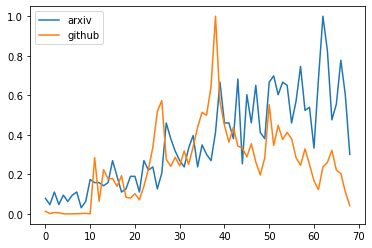

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")
ax.legend()
plt.show()

In [8]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(np.array([arxiv_df.url.values ,github_df.commits.values]).T, maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=26.0127 , p=0.0005  , df=7
likelihood ratio test: chi2=21.7215 , p=0.0028  , df=7
parameter F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (2.8170461750655615, 0.015541330460078441, 47.0, 7),
   'ssr_chi2test': (26.01272425486072, 0.0005010386707734917, 7),
   'lrtest': (21.72151479271173, 0.0028368849160228735, 7),
   'params_ftest': (2.8170461750654643, 0.01554133046008137, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [9]:
grangercausalitytests(np.array([arxiv_df.url.values/arxiv_df.url.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=8.2234  , p=0.0041  , df=1
likelihood ratio test: chi2=7.7630  , p=0.0053  , df=1
parameter F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=7.5946  , p=0.0224  , df=2
likelihood ratio test: chi2=7.1941  , p=0.0274  , df=2
parameter F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=8.0798  , p=0.0444  , df=3
likelihood ratio test: chi2=7.6222  , p=0.0545  , df=3
parameter F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8206  , p=0.1377  , df_d

{1: ({'ssr_ftest': (7.860648058759275, 0.00665361049710669, 65.0, 1),
   'ssr_chi2test': (8.22344719993278, 0.0041352573420292815, 1),
   'lrtest': (7.762976302998368, 0.0053328011885559095, 1),
   'params_ftest': (7.86064805875925, 0.006653610497106779, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.5138997693763505, 0.035842431906283154, 62.0, 2),
   'ssr_chi2test': (7.594557566071466, 0.02243173048325276, 2),
   'lrtest': (7.194120328693884, 0.02740416789097073, 2),
   'params_ftest': (3.5138997693763603, 0.035842431906282876, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.407612614757458, 0.07613949568179763, 59.0, 3),
   'ssr_chi2test': (8.079784707152148, 0.04439125588032382, 3),
   'lrtest': (7.622204177697597, 0.05450026018061172, 3),
   'params_ftest': (2.407612614757452, 0.07613949568179823, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

In [10]:
#Counter test for reverse granger, luckily it fails
grangercausalitytests(np.array([github_df.commits.values, arxiv_df.url.values ]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7798  , df=1
parameter F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0122  , p=0.9939  , df=2
likelihood ratio test: chi2=0.0122  , p=0.9939  , df=2
parameter F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1226  , p=0.9890  , df=3
likelihood ratio test: chi2=0.1225  , p=0.9890  , df=3
parameter F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2591  , p=0.9029  , df_d

{1: ({'ssr_ftest': (0.07478016712230048, 0.7853669684275922, 65.0, 1),
   'ssr_chi2test': (0.07823155945102205, 0.7797084060334569, 1),
   'lrtest': (0.07818659263557493, 0.7797700926201068, 1),
   'params_ftest': (0.07478016712230512, 0.7853669684275922, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.005652489167976021, 0.9943639684572634, 62.0, 2),
   'ssr_chi2test': (0.012216670137238497, 0.9939102828825196, 2),
   'lrtest': (0.01221555648874073, 0.9939108363160204, 2),
   'params_ftest': (0.005652489167977999, 0.99436396845726, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.036543912097105294, 0.99055435428453, 59.0, 3),
   'ssr_chi2test': (0.12263889144452284, 0.9889886947688673, 3),
   'lrtest': (0.1225250907471036, 0.9890036450713326, 3),
   'params_ftest': (0.03654391209710591, 0.9905543542845292, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

Conclusions:
- Reverse granger luckily fails
- Unnormalized granger good at 7
- Normalized granger extremely good at 1
- Interestingly normalized granger recovers exact unnormalized at 7

In [21]:
google_trends_df = pd.read_csv("GoogleTrands_deepfake.csv", header=1)
google_trends_df["Month"] = pd.to_datetime(google_trends_df["Month"])
google_trends_df= google_trends_df.rename({"deepfake: (Worldwide)":"searches"}, axis='columns')
google_trends_df["searches"] = google_trends_df["searches"].replace("<1", "0").astype(int)
google_trends_df = google_trends_df[google_trends_df.Month.gt("2017")].sort_values(by="Month")
google_trends_df

,Month,searches
49,2017-02-01,0
50,2017-03-01,0
51,2017-04-01,0
52,2017-05-01,0
53,2017-06-01,0
54,2017-07-01,0
55,2017-08-01,0
56,2017-09-01,0
57,2017-10-01,0
58,2017-11-01,0


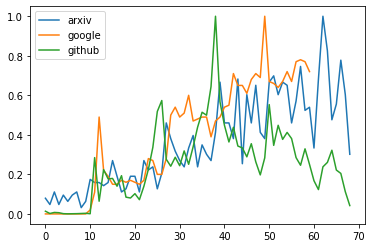

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.searches.values/google_trends_df.searches.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

In [24]:
#is it off by 1 bug or reality, that github is earlier???
#what is the downtrend in github at the end?
#cut till Google ends